In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.6 MB/s eta 0:00:00


In [2]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.5/960.5 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.19.0-py3-none-any.whl size=1318243 sha256=75a59aa3c31d3f69f3ba5a9ffc4f198e3932d9402f2dae94612d6fa31819d630
  Stored in directory: /root/.cache/pip/wheels/32/0a/b3/c8bcc1fe8fdaf05936000cce813a2505ac5b23e6aafb1addf5
Successfully built diffusers


In [20]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
import torchvision.transforms as transforms

In [5]:
import torch
from PIL import Image, ImageOps
from diffusers import StableDiffusionInstructPix2PixPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [6]:
model_id = "timbrooks/instruct-pix2pix"

In [7]:
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [8]:
def generate(input_image, instruction, steps, text_cfg_scale, image_cfg_scale):
        seed = random.randint(0, 100000)
        width, height = input_image.size
        factor = 512 / max(width, height)
        factor = math.ceil(min(width, height) * factor / 64) * 64 / min(width, height)
        width = int((width * factor) // 64) * 64
        height = int((height * factor) // 64) * 64
        input_image = ImageOps.fit(input_image, (width, height))

        if instruction == "":
            return [input_image, seed]

        generator = torch.manual_seed(seed)
        edited_image = pipe(
            instruction, image=input_image,
            guidance_scale=text_cfg_scale, image_guidance_scale=image_cfg_scale,
            num_inference_steps=steps, generator=generator,
        ).images[0]

        return(edited_image)

In [17]:
def edit(input_image_path, instructions, steps, text_cfg_scale, image_cfg_scale):
    input_image = Image.open(input_image_path).convert("RGB")
    edited_image = generate(input_image, instructions[0], steps, text_cfg_scale, image_cfg_scale)
    ins = instructions[0]
    if len(instructions) > 1:
        ins = ', '.join(instructions)
        for i in range(1,len(instructions)):
            edited_image = generate(edited_image, instructions[i], steps, text_cfg_scale, image_cfg_scale)
    edited_image.save('result.png')
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.imshow(input_image)
    ax2.imshow(edited_image)

    ax1.set_axis_off()
    ax2.set_axis_off()

    ax1.set_title('Input Image')
    ax2.set_title('Edited Image')
    fig.suptitle(ins, fontsize=16, y=0.95)
    plt.show()

# Example

In [15]:
input_image_path = '/content/1.png'
steps=50

  0%|          | 0/50 [00:00<?, ?it/s]

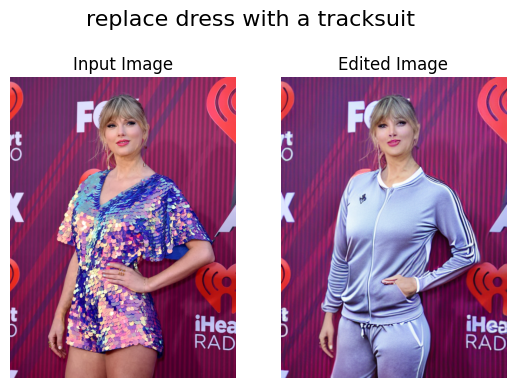

In [18]:
instructions = ['replace dress with a tracksuit']
text_cfg_scale= 7.6
image_cfg_scale=1.6
edit(input_image_path, instructions, steps, text_cfg_scale, image_cfg_scale)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

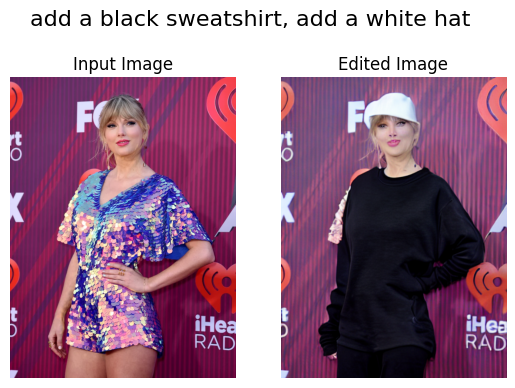

In [19]:
instruction = ['add a black sweatshirt', 'add a white hat']
text_cfg_scale = 7.8
image_cfg_scale = 1.7
edit(input_image_path, instruction, steps, text_cfg_scale, image_cfg_scale)